In [66]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.models import load_model

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [25]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = '../fruit-images-for-object-detection/input/train_zip/train'

for filename in os.listdir('../fruit-images-for-object-detection/input/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [34]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '../fruit-images-for-object-detection/input/test_zip/test'

for filename in os.listdir('../fruit-images-for-object-detection/input/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

In [69]:
test_images_hamza = []
shape = (200,200)
test_path_hamza = '../fruit-images-for-object-detection/input/hamza_test'

for filename in os.listdir('../fruit-images-for-object-detection/input/hamza_test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path_hamza,filename))
        

        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images_hamza.append(img)
        
# Converting test_images to array
test_images_hamza = np.array(test_images_hamza)

[ True False False False]


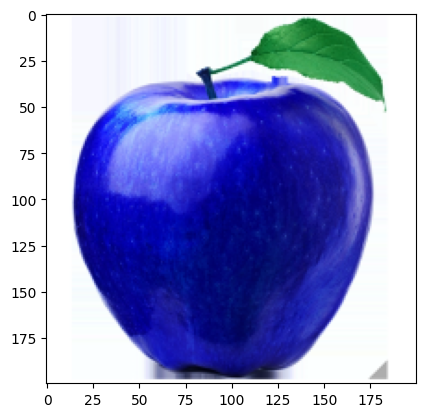

In [37]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[ True False False False]


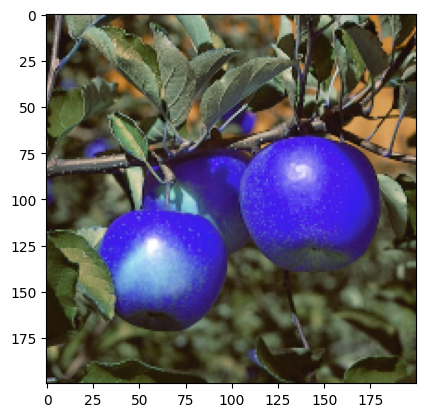

In [38]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [39]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [40]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 30)       

In [41]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 14s 3s/step - loss: 3.3881 - acc: 0.2944 - val_loss: 1.9748 - val_acc: 0.2667
Epoch 2/50
4/4 [==============================] - 12s 3s/step - loss: 1.7804 - acc: 0.3444 - val_loss: 2.0926 - val_acc: 0.3333
Epoch 3/50
4/4 [==============================] - 12s 3s/step - loss: 1.8746 - acc: 0.4167 - val_loss: 1.0475 - val_acc: 0.5500
Epoch 4/50
4/4 [==============================] - 12s 3s/step - loss: 1.3535 - acc: 0.5000 - val_loss: 1.2127 - val_acc: 0.5167
Epoch 5/50
4/4 [==============================] - 12s 3s/step - loss: 0.9321 - acc: 0.5944 - val_loss: 1.1647 - val_acc: 0.7167
Epoch 6/50
4/4 [==============================] - 12s 3s/step - loss: 0.8413 - acc: 0.6889 - val_loss: 1.0606 - val_acc: 0.7833
Epoch 7/50
4/4 [==============================] - 12s 3s/step - loss: 0.6890 - acc: 0.7556 - val_loss: 0.6804 - val_acc: 0.7667
Epoch 8/50
4/4 [==============================] - 12s 3s/step - loss: 0.6241 - acc: 0.7722 - val_loss: 0

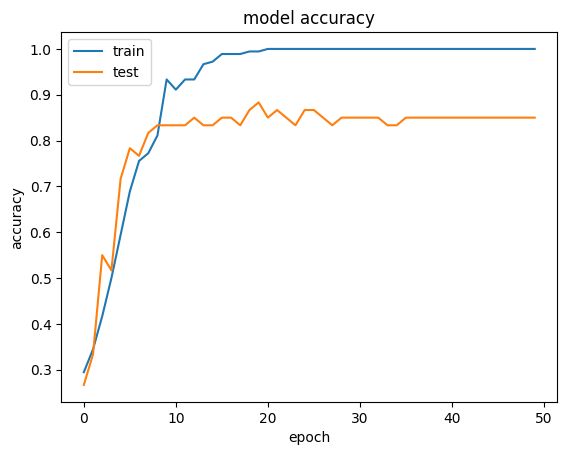

In [42]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

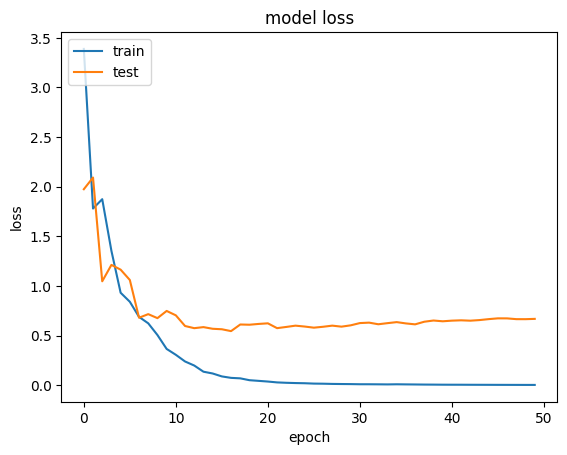

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 402ms/step - loss: 0.6689 - acc: 0.8500
[0.6689311861991882, 0.8500000238418579]


In [74]:
# Testing predictions and the actual label
checkImage = test_images_hamza[1:2]
#checklabel = test_labels[26:27]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

#print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 51ms/step
Predicted :-  apple


<h1 style='color:red;'>Save Model</h1>

In [59]:
# save model

model.save('my_model/fruit-images-for-object-detection-v1.h5')


<h1 style='color:red;'>Load Model</h1>

In [67]:
# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('my_model/fruit-images-for-object-detection-v1.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 30)       

<h1 style='color:red;'>TEST Load Model</h1>

In [68]:
# Testing predictions and the actual label
checkImage = test_images_hamza[0:1]
#checklabel = test_labels[26:27]

predict = new_model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

#print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 158ms/step
Predicted :-  apple
